<a href="https://colab.research.google.com/github/avijit4000/-Bayesian-PyMC-statistical-programmer/blob/main/bayson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT DESCRIPTION:
I'm seeking a statistical programmer proficient in Stan or PyMC to conduct path analysis of our survey data. The ideal candidate will have a strong understanding of Bayesian statistical programming. The work will include coding data transformation, coding statistical models, model execution and diagnostics - with frequent code review, using GitHub. Part of the work is documenting in the supplement of a scientific research paper - the statistical programmer will be co-author.


FIRST MILESTONE:
Freelancer develops a PyMC program in the latest PyMC version.
The program contains
　(1) one model,
　(2) test data generation,
　(3) running the model on the data, and
　(4) summarising the results both in table and visually.
Re (1): The model has a binary outcome variable and an ordinal predictor variable. The model puts a normal random walk constraint on the predictor, thereby ensuring that the differences between the estimates of consecutive levels of the predictor are approximately, but not exactly equal (Client believes this is a realistic model of a Likert scale).
Re (2): The test data generation produces 5*100 rows, first column predictor level (1, 2, 3, 4, 5 - 100 rows for each), second column outcome (0 or 1) randomly generated according to the following probabilities of outcome=1: (10%, 20%, 30%, 40%, 50% - for each predictor level)

In [2]:
pip install aesara

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [4]:
import numpy as np
my_type = np.dtype('float32').type

In [6]:
pip uninstall aesara

Found existing installation: aesara 2.9.4
Uninstalling aesara-2.9.4:
  Would remove:
    /usr/local/bin/aesara-cache
    /usr/local/lib/python3.11/dist-packages/aesara-2.9.4.dist-info/*
    /usr/local/lib/python3.11/dist-packages/aesara/*
    /usr/local/lib/python3.11/dist-packages/bin/*
Proceed (Y/n)? y
  Successfully uninstalled aesara-2.9.4


In [7]:
pip install aesara

  Using cached aesara-2.9.4-py3-none-any.whl.metadata (2.6 kB)
Using cached aesara-2.9.4-py3-none-any.whl (1.4 MB)


In [13]:
import arviz as az

In [12]:
import pandas as pd
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np

In [17]:
import aesara.tensor as at

AttributeError: partially initialized module 'aesara' has no attribute 'compile' (most likely due to a circular import)

In [14]:
rm aesara.py __pycache__ -rf

In [15]:
pip show aesara

Name: aesara
Version: 2.9.4
Summary: A library for defining, optimizing, and efficiently evaluating mathematical expressions involving multi-dimensional arrays.
Home-page: https://github.com/aesara-devs/aesara
Author: 
Author-email: aesara-devs <aesara.devs@gmail.com>
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: cons, etuples, filelock, logical-unification, minikanren, numpy, scipy, setuptools, typing-extensions
Required-by: 


In [16]:
pip install aesara

In [18]:
import pymc as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [19]:
# Step 1: Generate Test Data
np.random.seed(42)

n_levels = 5
n_rows = 100
predictor = np.repeat(np.arange(1, n_levels + 1), n_rows)

In [20]:
# Define probabilities for outcome = 1 based on predictor level
probs = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
outcome = np.random.binomial(1, probs[predictor - 1])

In [21]:
# Create DataFrame
data = pd.DataFrame({'predictor': predictor, 'outcome': outcome})
print(data.head())

   predictor  outcome
0          1        0
1          1        1
2          1        0
3          1        0
4          1        0


In [23]:
pip install numpy==1.26.4

In [25]:
pip install "numpy==1.26.4" "pytensor==2.19.1"

ERROR: Could not find a version that satisfies the requirement pytensor==2.19.1 (from versions: 2.8.10, 2.8.11, 2.9.1, 2.10.0, 2.10.1, 2.11.0, 2.11.1, 2.11.2, 2.11.3, 2.12.0, 2.12.1, 2.12.2, 2.12.3, 2.13.0, 2.13.1, 2.14.0, 2.14.1, 2.14.2, 2.15.0, 2.16.0, 2.16.1, 2.16.2, 2.16.3, 2.17.0, 2.17.1, 2.17.2, 2.17.3, 2.17.4, 2.18.0, 2.18.1, 2.18.2, 2.18.3, 2.18.4, 2.18.5, 2.18.6, 2.19.0, 2.20.0, 2.21.0, 2.22.0, 2.22.1, 2.23.0, 2.24.0, 2.24.1, 2.24.2, 2.25.0, 2.25.1, 2.25.2, 2.25.3, 2.25.4, 2.25.5, 2.26.0, 2.26.1, 2.26.2, 2.26.3, 2.26.4, 2.27.0, 2.27.1, 2.28.0, 2.28.1, 2.28.2, 2.28.3, 2.29.0, 2.30.0, 2.30.1, 2.30.2)
ERROR: No matching distribution found for pytensor==2.19.1


In [26]:
# Step 2: Define the PyMC Model
with pm.Model() as model:
    # Prior for intercept
    intercept = pm.Normal("intercept", mu=0, sigma=10)

    # Random Walk for Predictor Effect
    beta = pm.GaussianRandomWalk("beta", sigma=0.5, shape=n_levels)

    # Logistic regression likelihood
    logit_p = intercept + beta[predictor - 1]
    p = pm.math.sigmoid(logit_p)

    outcome_obs = pm.Bernoulli("outcome_obs", p=p, observed=outcome)

    # Sampling
    trace = pm.sample(2000, return_inferencedata=True, cores=2)

/usr/local/lib/python3.11/dist-packages/pymc/distributions/timeseries.py:297: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100)`.You can specify an init_dist manually to suppress this warning.
  warnings.warn(
ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.5)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 11


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_ynldg0lh


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_usnhx1a8


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: MakeVector{dtype='int64'}(4)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py",


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_0h4idfwt


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(100)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_kivzoz3d


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_iuksbqqh


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.5)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_phaxi09l

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_4guufhhd


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: MakeVector{dtype='int64'}(4)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py",


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_a3cjktq6

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_58prtm3c


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_045ihc6z


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.5)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_hcokbxz_


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_ptplsbpt

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_i2fa8oxy


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(100)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_s3jk46d_

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_oqeq7a5w


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(100)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logpro


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_br18ukb6

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_9nc3vsmq


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.5)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logpro


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_g_kztd97

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_g_a3o662


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: MakeVector{dtype='int64'}(4)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"L


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_fd9125m0


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(100)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logpro


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_wqdig7v5

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_fa05fz62


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.5)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logpro


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_fpr_243u

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_c8h8serf


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: MakeVector{dtype='int64'}(4)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"L


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_79k8kvp5

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_pagoc61j


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logpro


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_qwl3oa8i

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_6xlgk2i_


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(100)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logpro


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_m2595lzb

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_f1325rpz


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.5)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logpro


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_k3a7iywd

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_jxqksfd7


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: MakeVector{dtype='int64'}(4)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"L


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_bgep64i8

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_8lto9dl1


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logprob 


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_ms9obwoz

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_53gm5opf


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logpro


You can find the C code in this temporary file: /tmp/pytensor_compilation_error__zmx2b3g

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_tihtxkp6


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(100)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logpro


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_uqojw8ya

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_gevayrjd


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ScalarFromTensor(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logprob me


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_lnxbd51q

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_hty762m1


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7d051d89b920>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-99b71e


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_fl_vt6nn


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.5)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_rfaqui2p

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_gcrboafc


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: MakeVector{dtype='int64'}(4)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py",


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_7s4fsya8

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_4yokblx9


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_to0jix0g

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_op1vsduy


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_35wh8ipj

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_w7askkma


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(100)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_by8dnib1

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_lgcdzira


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.5)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_zaw73wfq

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_sq_3s1ih


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: MakeVector{dtype='int64'}(4)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py",


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_frz_dr_1

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_3hsixm6o


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_ycuh0kqf

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_m2lmi2a4


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logprob 


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_0g7jul_q

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_ep_9gsb3


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logpro


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_sv4to_if

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_hqpi01xw


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(100)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logpro


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_dqjh4bzw

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_z7scnyj7


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.5)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logpro


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_skpaamjm

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_drym6_c3


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: MakeVector{dtype='int64'}(4)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"L


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_mcc9a7e1

You can find the C code in this temporary file: /tmp/pytensor_compilation_error__ul09hzn


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logpro


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_51vlvdbb

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_7bbd05dz


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(100)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logpro


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_aj50qe35

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_2zwca8vv


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.5)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logpro


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_zw0xjql4

You can find the C code in this temporary file: /tmp/pytensor_compilation_error__b5zk5ac


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: MakeVector{dtype='int64'}(4)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"L


You can find the C code in this temporary file: /tmp/pytensor_compilation_error__bj5enk3

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_e13ckrne


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logprob 


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_1j1mm5ip

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_27d_vqa5


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logpro


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_08b_ukkq

You can find the C code in this temporary file: /tmp/pytensor_compilation_error__jkk9b1p


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(100)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logpro


You can find the C code in this temporary file: /tmp/pytensor_compilation_error__c4paljv

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_122sbolb


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ScalarFromTensor(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/basic.py", line 207, in logp
    return _logprob_helper(rv, value, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 81, in _logprob_helper
    logprob = _logprob(rv.owner.op, values, *rv.owner.inputs, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pymc/logprob/abstract.py", line 76, in _logprob
    raise NotImplementedError(f"Logprob me


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_igb2amrz

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_ca83t417


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding



You can find the C code in this temporary file: /tmp/pytensor_compilation_error_ugehvw3k

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_i7qfgirg


ERROR:pytensor.graph.rewriting.basic:node: Cast{float64}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_rfc43g6m

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_tvn8jbj5


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: Cast{float64}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, 


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_990gwoyf

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_z158s6p8


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_99ke1s1m

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_wl6nbfre


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0.0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_6x085ecl

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_6o2u7139

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_iql7aquf


CompileError: Compilation failed (return status=1):
/usr/bin/g++ -shared -g -Wno-c++11-narrowing -fno-exceptions -fno-unwind-tables -fno-asynchronous-unwind-tables -march=broadwell -mmmx -mpopcnt -msse -msse2 -msse3 -mssse3 -msse4.1 -msse4.2 -mavx -mavx2 -mno-sse4a -mno-fma4 -mno-xop -mfma -mno-avx512f -mbmi -mbmi2 -maes -mpclmul -mno-avx512vl -mno-avx512bw -mno-avx512dq -mno-avx512cd -mno-avx512er -mno-avx512pf -mno-avx512vbmi -mno-avx512ifma -mno-avx5124vnniw -mno-avx5124fmaps -mno-avx512vpopcntdq -mno-avx512vbmi2 -mno-gfni -mno-vpclmulqdq -mno-avx512vnni -mno-avx512bitalg -mno-avx512bf16 -mno-avx512vp2intersect -mno-3dnow -madx -mabm -mno-cldemote -mno-clflushopt -mno-clwb -mno-clzero -mcx16 -mno-enqcmd -mf16c -mfsgsbase -mfxsr -mhle -msahf -mno-lwp -mlzcnt -mmovbe -mno-movdir64b -mno-movdiri -mno-mwaitx -mno-pconfig -mno-pku -mno-prefetchwt1 -mprfchw -mno-ptwrite -mno-rdpid -mrdrnd -mrdseed -mrtm -mno-serialize -mno-sgx -mno-sha -mno-shstk -mno-tbm -mno-tsxldtrk -mno-vaes -mno-waitpkg -mno-wbnoinvd -mxsave -mno-xsavec -mxsaveopt -mno-xsaves -mno-amx-tile -mno-amx-int8 -mno-amx-bf16 -mno-uintr -mno-hreset -mno-kl -mno-widekl -mno-avxvnni --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=56320 -mtune=broadwell -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/local/lib/python3.11/dist-packages/numpy/_core/include -I/usr/include/python3.11 -I/usr/local/lib/python3.11/dist-packages/pytensor/link/c/c_code -L/usr/lib/x86_64-linux-gnu -L/usr/lib -fvisibility=hidden -o /root/.pytensor/compiledir_Linux-6.1.85+-x86_64-with-glibc2.35-x86_64-3.11.11-64/lazylinker_ext/lazylinker_ext.so /root/.pytensor/compiledir_Linux-6.1.85+-x86_64-with-glibc2.35-x86_64-3.11.11-64/lazylinker_ext/mod.cpp -lpython3.11
/root/.pytensor/compiledir_Linux-6.1.85+-x86_64-with-glibc2.35-x86_64-3.11.11-64/lazylinker_ext/mod.cpp:7:10: fatal error: numpy/npy_3kcompat.h: No such file or directory
    7 | #include "numpy/npy_3kcompat.h"
      |          ^~~~~~~~~~~~~~~~~~~~~~
compilation terminated.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("rainfall.csv")

# Encode months numerically (Jan = 1, ..., Dec = 12)
df['Month_num'] = pd.to_datetime(df['Month'], format='%b').dt.month
df['Time'] = (df['Year'] - df['Year'].min()) * 12 + df['Month_num']  # continuous time

rainfall = df['Rainfall_mm'].values
time = df['Time'].values


In [36]:
df

,Year,Month,Rainfall_mm,Month_num,Time
0,2010,Jan,70.0,1,1
1,2010,Feb,74.6,2,2
2,2010,Mar,86.5,3,3
3,2010,Apr,91.2,4,4
4,2010,May,62.7,5,5
...,...,...,...,...,...
495,2051,Apr,81.4,4,496
496,2051,May,54.6,5,497
497,2051,Jun,48.1,6,498
498,2051,Jul,26.2,7,499


In [37]:
import pymc as pm
import arviz as az

with pm.Model() as model:
    # Priors for intercept and trend
    alpha = pm.Normal("alpha", mu=50, sigma=20)       # average rainfall
    beta = pm.Normal("beta", mu=0, sigma=1)           # linear trend

    # Seasonality using Fourier series (12 months periodic)
    A = pm.Normal("A", mu=0, sigma=10)
    B = pm.Normal("B", mu=0, sigma=10)

    # Expected rainfall with seasonal component
    mu = alpha + beta * time + A * np.sin(2 * np.pi * time / 12) + B * np.cos(2 * np.pi * time / 12)

    # Likelihood
    sigma = pm.HalfNormal("sigma", sigma=10)
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=rainfall)

    # Inference
    trace = pm.sample(1000, tune=1000, target_accept=0.9, return_inferencedata=True)


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: Cast{float64}([  1   2 ... 8 499 500])
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_rgu47s13

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_vws9qndm


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: Cast{float64}([  1   2 ... 8 499 500])
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_9yer5xbx


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: Cast{float64}([  1   2 ... 8 499 500])
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_zj0t4tcf

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_4auwzuyq


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: Cast{float64}([  1   2 ... 8 499 500])
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_7p7knh7q

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_j3f1ngmm


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: Cast{float64}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, 


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_i7p0l7bm

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_hmlnovps


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: Cast{float64}(50)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086,


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_qr5h5uwx

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_clipw6df


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: Cast{float64}(10)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086,


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_bbt218m0

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_x6hmhyrt


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: Cast{float64}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, 


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_uvpimyhq

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_mczd2ezu


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: Cast{float64}(50)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086,


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_4lofuzmz

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_lt0ls3d1


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: Cast{float64}(10)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086,


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_5t2sobby

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_652eqbl1


CompileError: Compilation failed (return status=1):
/usr/bin/g++ -shared -g -Wno-c++11-narrowing -fno-exceptions -fno-unwind-tables -fno-asynchronous-unwind-tables -march=broadwell -mmmx -mpopcnt -msse -msse2 -msse3 -mssse3 -msse4.1 -msse4.2 -mavx -mavx2 -mno-sse4a -mno-fma4 -mno-xop -mfma -mno-avx512f -mbmi -mbmi2 -maes -mpclmul -mno-avx512vl -mno-avx512bw -mno-avx512dq -mno-avx512cd -mno-avx512er -mno-avx512pf -mno-avx512vbmi -mno-avx512ifma -mno-avx5124vnniw -mno-avx5124fmaps -mno-avx512vpopcntdq -mno-avx512vbmi2 -mno-gfni -mno-vpclmulqdq -mno-avx512vnni -mno-avx512bitalg -mno-avx512bf16 -mno-avx512vp2intersect -mno-3dnow -madx -mabm -mno-cldemote -mno-clflushopt -mno-clwb -mno-clzero -mcx16 -mno-enqcmd -mf16c -mfsgsbase -mfxsr -mhle -msahf -mno-lwp -mlzcnt -mmovbe -mno-movdir64b -mno-movdiri -mno-mwaitx -mno-pconfig -mno-pku -mno-prefetchwt1 -mprfchw -mno-ptwrite -mno-rdpid -mrdrnd -mrdseed -mrtm -mno-serialize -mno-sgx -mno-sha -mno-shstk -mno-tbm -mno-tsxldtrk -mno-vaes -mno-waitpkg -mno-wbnoinvd -mxsave -mno-xsavec -mxsaveopt -mno-xsaves -mno-amx-tile -mno-amx-int8 -mno-amx-bf16 -mno-uintr -mno-hreset -mno-kl -mno-widekl -mno-avxvnni --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=56320 -mtune=broadwell -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/local/lib/python3.11/dist-packages/numpy/_core/include -I/usr/include/python3.11 -I/usr/local/lib/python3.11/dist-packages/pytensor/link/c/c_code -L/usr/lib/x86_64-linux-gnu -L/usr/lib -fvisibility=hidden -o /root/.pytensor/compiledir_Linux-6.1.85+-x86_64-with-glibc2.35-x86_64-3.11.11-64/lazylinker_ext/lazylinker_ext.so /root/.pytensor/compiledir_Linux-6.1.85+-x86_64-with-glibc2.35-x86_64-3.11.11-64/lazylinker_ext/mod.cpp -lpython3.11
/root/.pytensor/compiledir_Linux-6.1.85+-x86_64-with-glibc2.35-x86_64-3.11.11-64/lazylinker_ext/mod.cpp:7:10: fatal error: numpy/npy_3kcompat.h: No such file or directory
    7 | #include "numpy/npy_3kcompat.h"
      |          ^~~~~~~~~~~~~~~~~~~~~~
compilation terminated.


In [ ]:
az.plot_trace(trace)
plt.show()

# Posterior Predictive Forecast for next 12 months
future_time = np.arange(time.max() + 1, time.max() + 13)

with model:
    posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["alpha", "beta", "A", "B", "sigma"])
    mu_pred = (posterior_predictive["alpha"][:, None] +
               posterior_predictive["beta"][:, None] * future_time +
               posterior_predictive["A"][:, None] * np.sin(2 * np.pi * future_time / 12) +
               posterior_predictive["B"][:, None] * np.cos(2 * np.pi * future_time / 12))

# Plot forecast
mean_pred = mu_pred.mean(axis=0)
std_pred = mu_pred.std(axis=0)

plt.figure(figsize=(10, 4))
plt.plot(df['Time'], rainfall, label="Observed Rainfall")
plt.plot(future_time, mean_pred, label="Forecast")
plt.fill_between(future_time, mean_pred - 2*std_pred, mean_pred + 2*std_pred, alpha=0.3, label="95% CI")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Rainfall (mm)")
plt.title("Rainfall Forecast (Bayesian Model with Seasonality)")
plt.show()


In [27]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate 500 entries from 2010 to approx 2051 (500 / 12 ≈ 41.6 years)
years = np.repeat(np.arange(2010, 2010 + 42), 12)[:500]
months = np.tile(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 42)[:500]

# Simulate seasonal rainfall pattern with noise
month_numbers = np.tile(np.arange(1, 13), 42)[:500]
seasonal = 50 + 30 * np.sin(2 * np.pi * month_numbers / 12)
rainfall_mm = seasonal + np.random.normal(0, 10, size=500)

# Create DataFrame
rainfall_df = pd.DataFrame({
    'Year': years,
    'Month': months,
    'Rainfall_mm': np.round(rainfall_mm, 1)
})


In [28]:
rainfall_df

,Year,Month,Rainfall_mm
0,2010,Jan,70.0
1,2010,Feb,74.6
2,2010,Mar,86.5
3,2010,Apr,91.2
4,2010,May,62.7
...,...,...,...
495,2051,Apr,81.4
496,2051,May,54.6
497,2051,Jun,48.1
498,2051,Jul,26.2


In [32]:
rainfall_df.to_csv("rainfall.csv",index=False)

In [33]:
data=pd.read_csv("rainfall.csv")

In [34]:
data

,Year,Month,Rainfall_mm
0,2010,Jan,70.0
1,2010,Feb,74.6
2,2010,Mar,86.5
3,2010,Apr,91.2
4,2010,May,62.7
...,...,...,...
495,2051,Apr,81.4
496,2051,May,54.6
497,2051,Jun,48.1
498,2051,Jul,26.2


In [38]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [40]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

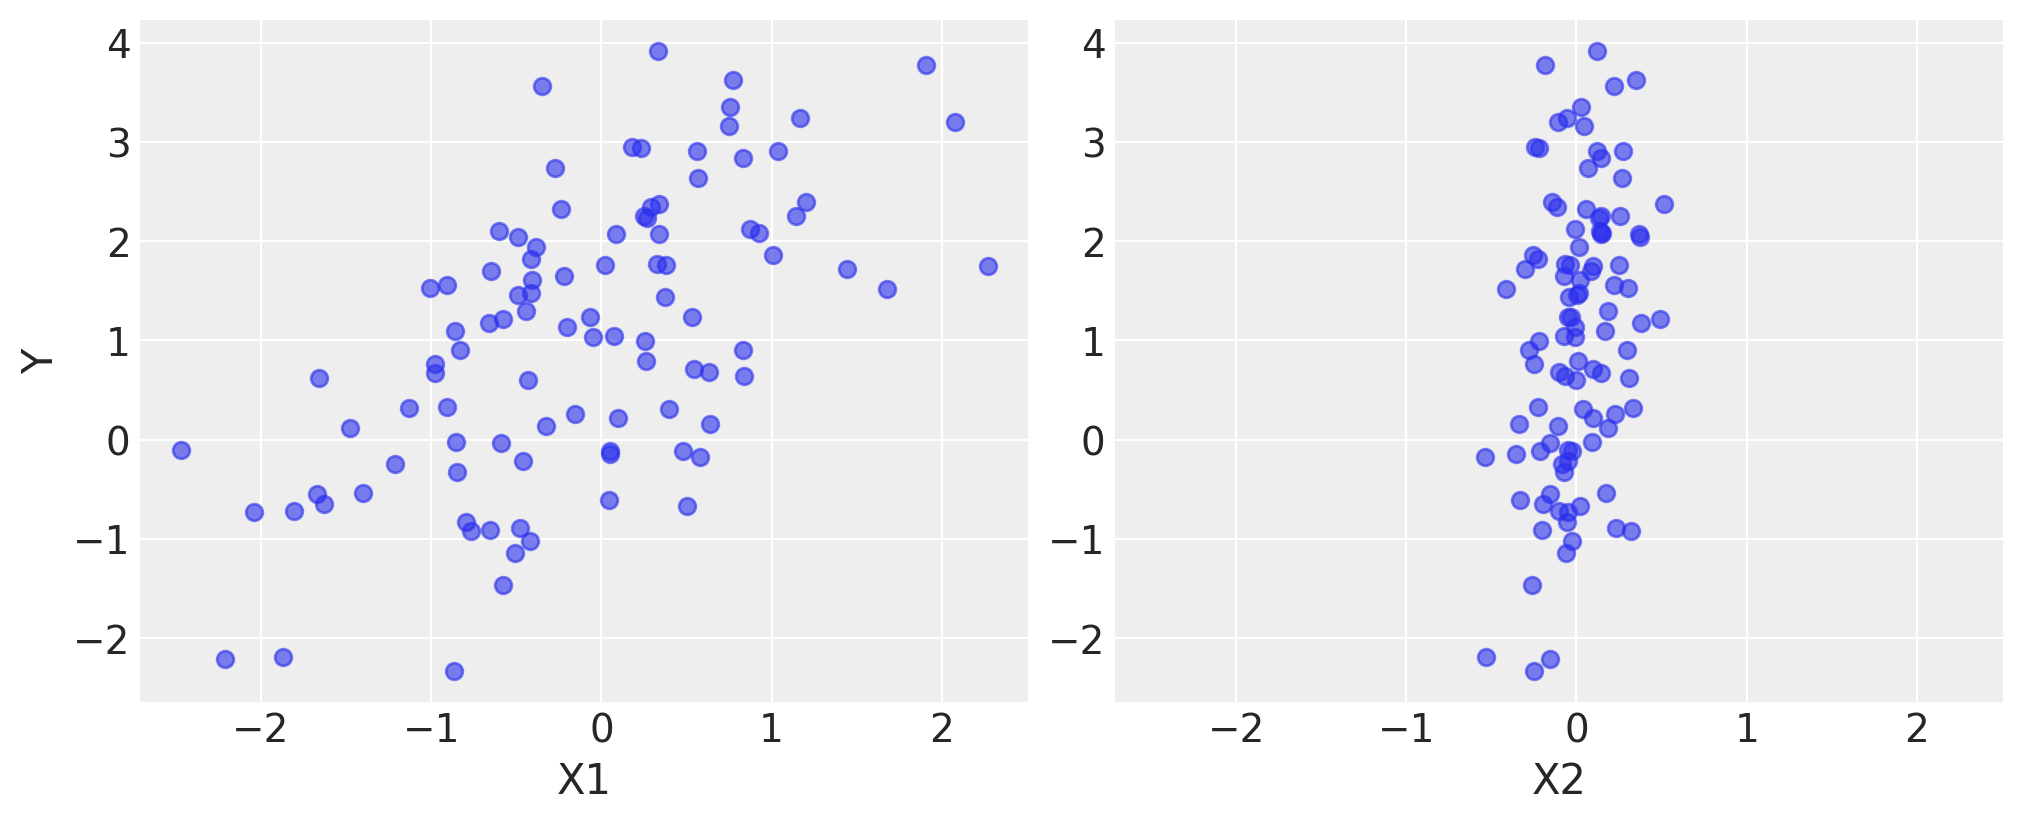

In [41]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [3]:
pip install numpy==1.24.4

In [5]:
pip install numpy==1.24.4

In [7]:
pip install numpy.exceptions

ERROR: Could not find a version that satisfies the requirement numpy.exceptions (from versions: none)
ERROR: No matching distribution found for numpy.exceptions


In [8]:
from numpy.exceptions import AxisError

ModuleNotFoundError: No module named 'numpy.exceptions'

In [9]:
pip install numpy==1.24.4

In [10]:
!pip install numpy==1.24.4

In [11]:
from numpy.exceptions import AxisError

ModuleNotFoundError: No module named 'numpy.exceptions'

In [6]:
import pymc as pm
import numpy as np

print(f"PyMC version: {pm.__version__}")
print(f"NumPy version: {np.__version__}")


ModuleNotFoundError: No module named 'numpy.exceptions'

In [4]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

ModuleNotFoundError: No module named 'numpy.exceptions'

In [1]:
pip install numpy==1.24.4

In [43]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [44]:
basic_model = pm.Model()

In [47]:
with basic_model:
  alpha = pm.Normal('alpha', mu=0, sigma=10)
  beta = pm.Normal('beta', mu=0, sigma=10, shape=2)
  sigma = pm.HalfNormal('sigma', sigma=1)

In [48]:
mu = alpha + beta[0]*X1 + beta[1]*X2

In [50]:
Y_obs = Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)

TypeError: No model on context stack, which is needed to instantiate distributions. Add variable inside a 'with model:' block, or use the '.dist' syntax for a standalone distribution.

In [51]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()

ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(10)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_k2g6dcc2

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_bta9dkmp


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(10)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_ervorlzv

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_2qi6wt9y


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(10)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_zgm1nwxr


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_ib5x5y50


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(10)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_avc53iw9

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_hr4rfd50


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(10)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_mgz0_ucv

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_3savtxk8


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(10)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_6iry0rwq

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_j_eab_y8


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: Cast{float64}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, 


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_wxem2rfj

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_2ob1tp1t


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_8c00w01p

You can find the C code in this temporary file: /tmp/pytensor_compilation_error__nwlmuuz


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: Cast{float64}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, 


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_xbrj5ona

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_a2p_30vo


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_up50pd92

You can find the C code in this temporary file: /tmp/pytensor_compilation_error__kemrlbe


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: Cast{float64}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, 


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_buainfjx

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_rio94fa4


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_npygeuau

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_k90sx85p


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: Cast{float64}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, 


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_jk3esu9l

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_txrbamvd


ERROR:pytensor.graph.rewriting.basic:Rewrite failure due to: constant_folding
ERROR:pytensor.graph.rewriting.basic:node: ExpandDims{axis=0}(0)
ERROR:pytensor.graph.rewriting.basic:TRACEBACK:
ERROR:pytensor.graph.rewriting.basic:Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytensor/graph/rewriting/basic.py", line 1


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_f3qlk243

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_b1x_2s3q

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_t216q61v


CompileError: Compilation failed (return status=1):
/usr/bin/g++ -shared -g -Wno-c++11-narrowing -fno-exceptions -fno-unwind-tables -fno-asynchronous-unwind-tables -march=broadwell -mmmx -mpopcnt -msse -msse2 -msse3 -mssse3 -msse4.1 -msse4.2 -mavx -mavx2 -mno-sse4a -mno-fma4 -mno-xop -mfma -mno-avx512f -mbmi -mbmi2 -maes -mpclmul -mno-avx512vl -mno-avx512bw -mno-avx512dq -mno-avx512cd -mno-avx512er -mno-avx512pf -mno-avx512vbmi -mno-avx512ifma -mno-avx5124vnniw -mno-avx5124fmaps -mno-avx512vpopcntdq -mno-avx512vbmi2 -mno-gfni -mno-vpclmulqdq -mno-avx512vnni -mno-avx512bitalg -mno-avx512bf16 -mno-avx512vp2intersect -mno-3dnow -madx -mabm -mno-cldemote -mno-clflushopt -mno-clwb -mno-clzero -mcx16 -mno-enqcmd -mf16c -mfsgsbase -mfxsr -mhle -msahf -mno-lwp -mlzcnt -mmovbe -mno-movdir64b -mno-movdiri -mno-mwaitx -mno-pconfig -mno-pku -mno-prefetchwt1 -mprfchw -mno-ptwrite -mno-rdpid -mrdrnd -mrdseed -mrtm -mno-serialize -mno-sgx -mno-sha -mno-shstk -mno-tbm -mno-tsxldtrk -mno-vaes -mno-waitpkg -mno-wbnoinvd -mxsave -mno-xsavec -mxsaveopt -mno-xsaves -mno-amx-tile -mno-amx-int8 -mno-amx-bf16 -mno-uintr -mno-hreset -mno-kl -mno-widekl -mno-avxvnni --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=56320 -mtune=broadwell -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/local/lib/python3.11/dist-packages/numpy/_core/include -I/usr/include/python3.11 -I/usr/local/lib/python3.11/dist-packages/pytensor/link/c/c_code -L/usr/lib/x86_64-linux-gnu -L/usr/lib -fvisibility=hidden -o /root/.pytensor/compiledir_Linux-6.1.85+-x86_64-with-glibc2.35-x86_64-3.11.11-64/lazylinker_ext/lazylinker_ext.so /root/.pytensor/compiledir_Linux-6.1.85+-x86_64-with-glibc2.35-x86_64-3.11.11-64/lazylinker_ext/mod.cpp -lpython3.11
/root/.pytensor/compiledir_Linux-6.1.85+-x86_64-with-glibc2.35-x86_64-3.11.11-64/lazylinker_ext/mod.cpp:7:10: fatal error: numpy/npy_3kcompat.h: No such file or directory
    7 | #include "numpy/npy_3kcompat.h"
      |          ^~~~~~~~~~~~~~~~~~~~~~
compilation terminated.
